# Barebones MOM6 Diagnostics Example

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import numpy as np
import cmocean as cm
import cftime

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 16,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38285,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 16
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:41731,Total threads: 4
Dashboard: /proxy/35335/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:37891,


## Databases
Use the default COSIMA database for existing ACCESS-OM2 comparison runs.

There is also a MOM6-only database (maybe temporary)

In [3]:
session = cc.database.create_session()
session_mom6=cc.database.create_session('/g/data/ik11/outputs/mom6-om4-025/mom6.db')

In [9]:
cc.database.build_index('/g/data/ik11/outputs/mom6-om4-025/OM4_025.JRA_RYF',session_mom6)

Indexing experiment: OM4_025.JRA_RYF


100%|██████████| 135/135 [01:46<00:00,  1.27it/s]


135

## Experiments
So far we only have a single OM4 experiment

In [5]:
expt = 'OM4_025.JRA_RYF'

## Exploring the available data

Use this example with the Database Explorer

In [23]:
dbx = cc.explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

## A few diagnostics

### Global average temperature.

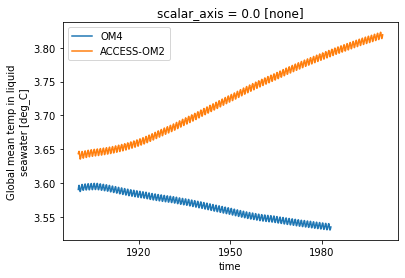

In [19]:
# MOM6
thetaoga = cc.querying.getvar(expt=expt,variable='thetaoga',session=session_mom6, frequency='1 monthly')
thetaoga.plot(label='OM4')
#ACCESS-OM2
temp_global_ave = cc.querying.getvar(expt='025deg_jra55_ryf9091_gadi',variable='temp_global_ave',session=session,end_time='2000-01-01')
temp_global_ave.plot(label='ACCESS-OM2')
plt.legend()

### Overturning

In [18]:
# MOM6
vmo = cc.querying.getvar(expt='OM4_025.JRA_RYF', variable='vmo', 
                          session=session_mom6, frequency='1 monthly',
                          attrs={'cell_methods': 'rho2_l:sum yq:point xh:sum time: mean'})
psi_mean = vmo.sel(time=slice('1945-01-01','1954-12-31')).mean('time').sum('xh').cumsum('rho2_l').load()/1e9

In [24]:
# ACCESS-OM2 -- did this run use GM??
psi = cc.querying.getvar(expt='025deg_jra55_ryf9091_gadi',variable='ty_trans_rho',session=session,start_time='1945-01-01', end_time='1954-12-31')
psi = psi / (1e9) # converts kg/s to Sv
psi = psi.sum('grid_xt_ocean').cumsum('potrho').mean(dim = 'time').load() 


Text(0.5, 1.0, 'ACCESS-OM2')

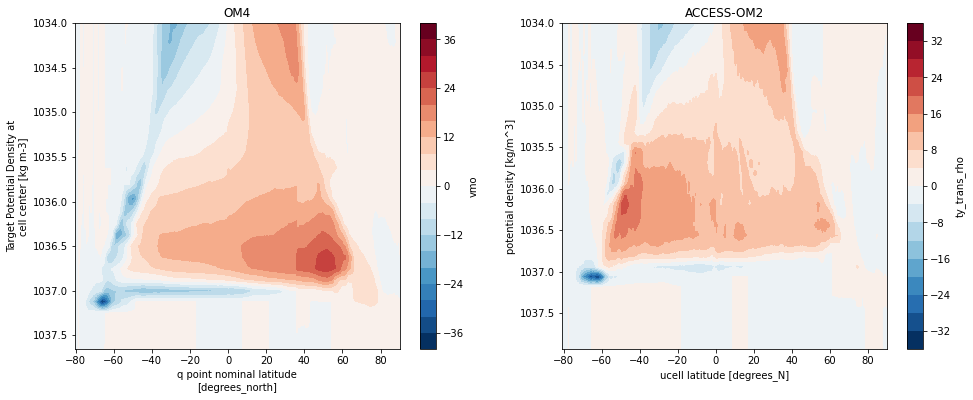

In [27]:
plt.figure(figsize=(16,6))
plt.subplot(121)
psi_mean.plot.contourf(levels=20)
plt.ylim(ymin=1034)
plt.gca().invert_yaxis()
plt.title('OM4')

plt.subplot(122)
psi.plot.contourf(levels=20)
plt.ylim(ymin=1034)
plt.gca().invert_yaxis()
plt.title('ACCESS-OM2')